In [1]:
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
%matplotlib inline

In [2]:
audio_data, sample_rate = sf.read("test_aaico_challenge.wav")


In [3]:
print(f"Sampling rate: {sample_rate} Hz")
print(f"Bit depth: {audio_data.dtype}")
print(f"Duration: {len(audio_data) / sample_rate} seconds")

Sampling rate: 48000 Hz
Bit depth: float64
Duration: 60.28145833333333 seconds


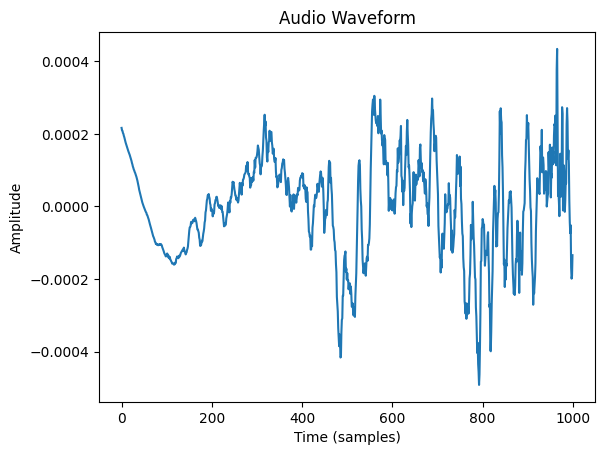

In [4]:
plt.plot(audio_data[:1000])  # Plot only a small portion for efficiency
plt.title("Audio Waveform")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

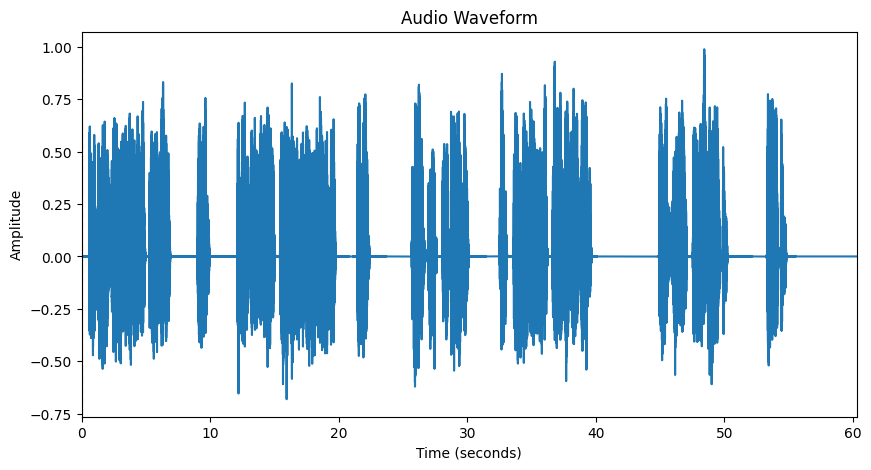

In [5]:
duration = len(audio_data) / sample_rate
timeline = np.linspace(0, duration, len(audio_data))  # create time axis

plt.figure(figsize=(10, 5))
plt.plot(timeline, audio_data)  # plot the waveform
plt.xlim(0, duration)  # set x-axis limits to match audio duration
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Audio Waveform")

# create the pointer line object
pointer_line = plt.axvline(0, color='red', linestyle='--', label='Pointer')


## Extracting Short Time Fourier Transform

In [6]:
scale , sr = librosa.load("test_aaico_challenge.wav")

FRAME_SIZE  = 2048
HOP_SIZE =  512

In [7]:
S_scale = librosa.stft(scale ,n_fft = FRAME_SIZE , hop_length=HOP_SIZE )

In [8]:
S_scale.shape

(1025, 2597)

## Calculataing the Spectogram

In [9]:
Y_scale = librosa.power_to_db(np.abs(S_scale)**2)

In [10]:
def plot_spectogram(Y , sr , hop_length , y_axis = 'linear'):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y , 
                             sr = sr,
                             hop_length = hop_length,
                             x_axis = "time",
                             y_axis = y_axis)
    
    plt.colorbar(format='%+2.f')

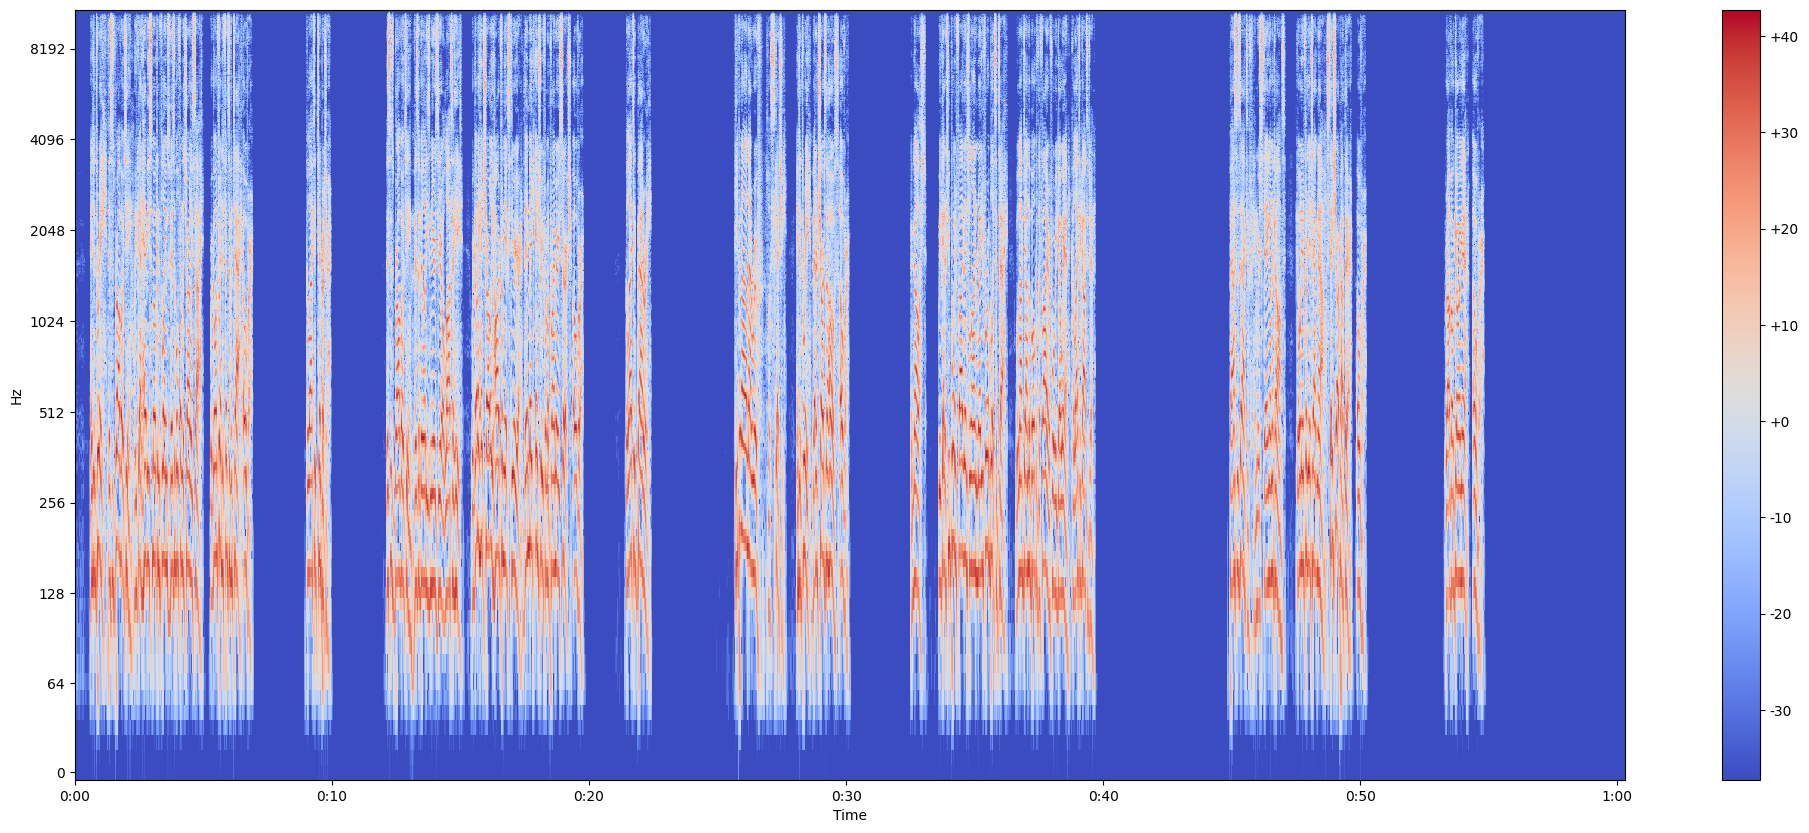

In [11]:
plot_spectogram(Y_scale , sr, HOP_SIZE , y_axis='log')

## Mel Spectogram

In [12]:
mel_spectogram = librosa.feature.melspectrogram(y = scale , sr=sr, n_fft=FRAME_SIZE , hop_length=HOP_SIZE  , n_mels = 10)

In [13]:
log_mel_spectogram = librosa.power_to_db(mel_spectogram)

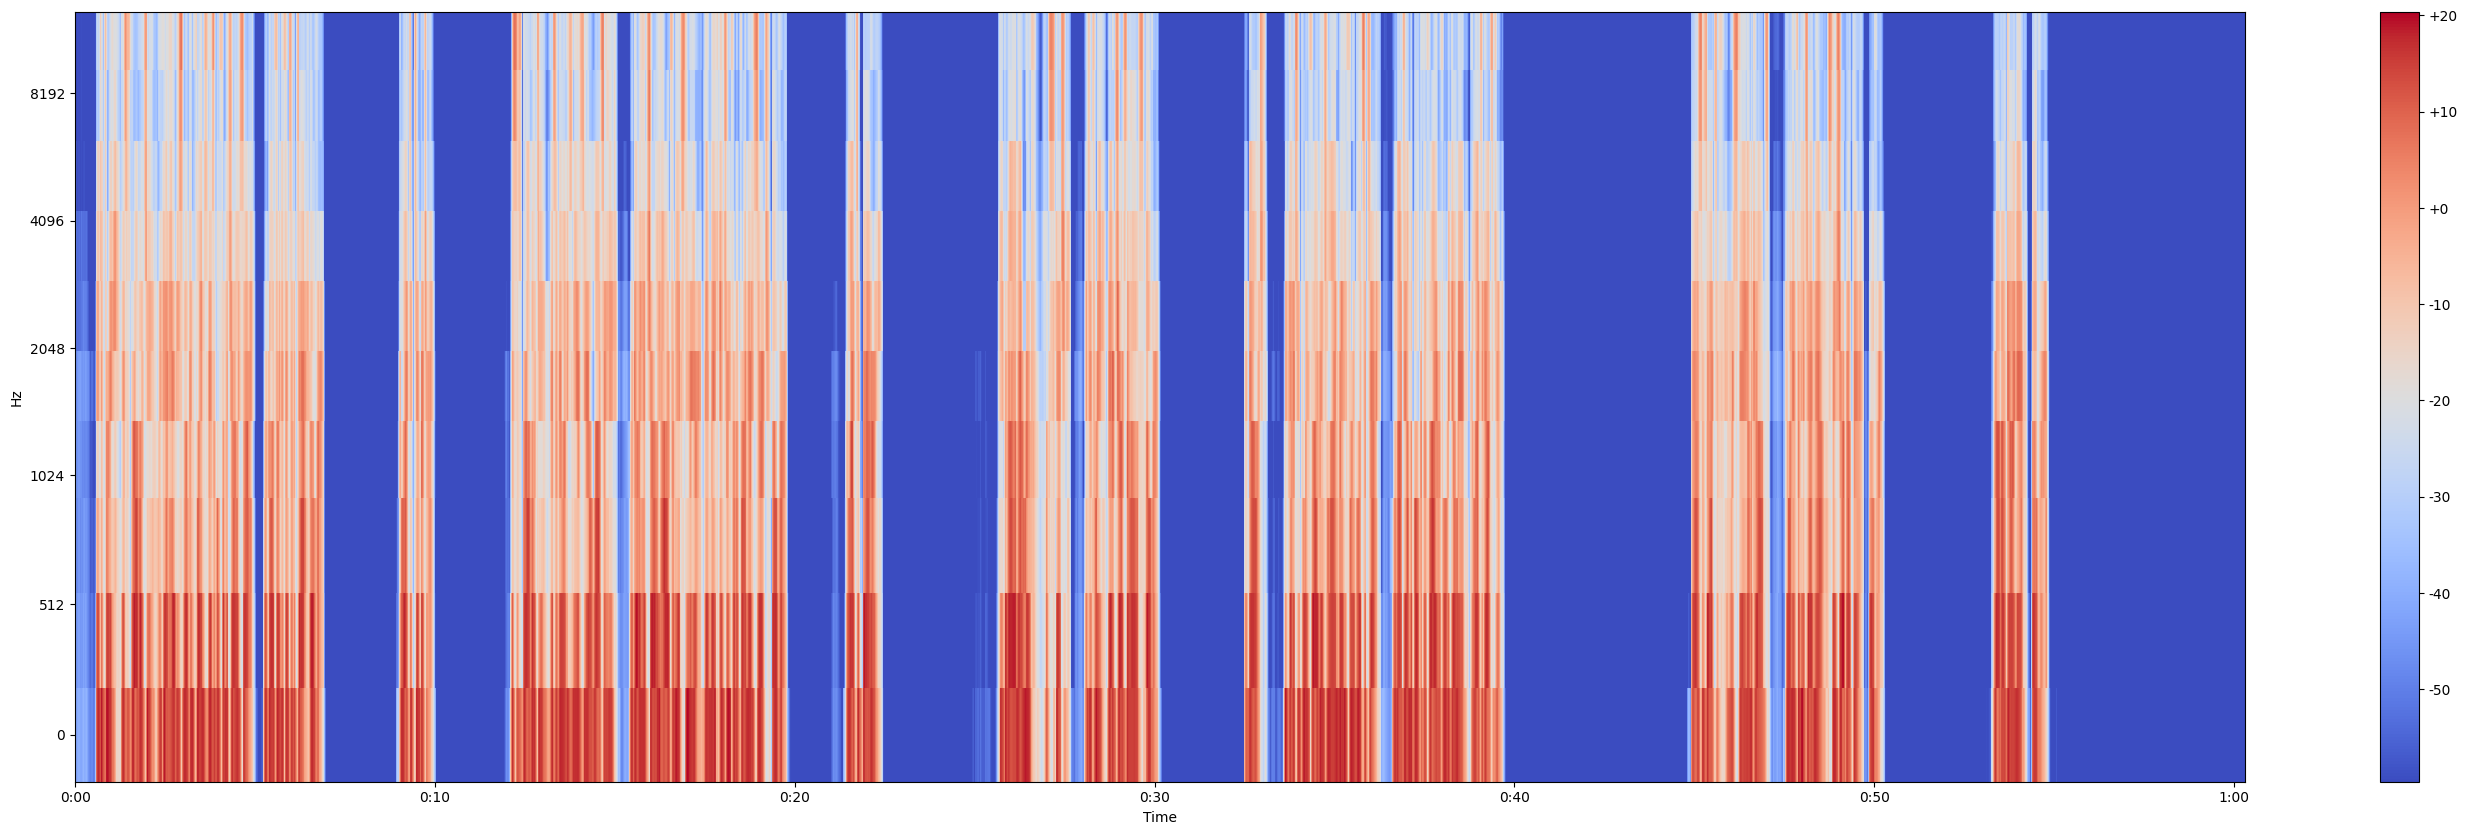

In [14]:
plt.figure(figsize=(35, 10))
librosa.display.specshow(log_mel_spectogram,
                         x_axis="time",
                         y_axis="mel",
                         sr = sr)
plt.colorbar(format = "%+2.f")

In [21]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print(f"Number of GPUs available: {len(physical_devices)}")


Number of GPUs available: 0


In [22]:
tf.config.set_visible_devices

<function tensorflow.python.framework.config.set_visible_devices(devices, device_type=None)>

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_bcnn_model(input_shape):


    model = models.Sequential()

    model.add(layers.Reshape((input_shape[0], 1), input_shape=(input_shape[0],)))


    # Convolutional layers
    model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    return model

# Assuming input_shape is the shape of your input data (e.g., (frame_size, num_features))
input_shape = (2025456,)
bcnn_model = create_bcnn_model(input_shape)

# Compile the model
bcnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary for a quick overview
bcnn_model.summary()


IndexError: list index out of range

In [ ]:
import numpy as np

def label_audio_data(command_samples):
 
  labels = np.ones(len(audio_data))  # Initialize all labels to 1 (non-command)
  for start, end in command_samples:
    labels[start:end] = 0  # Set labels to 0 for samples within command regions
  return labels

# Example usage
command_samples = [
    [142000, 160000],
    [340000, 360000],
    [620000, 635000]
]

labels = label_audio_data(command_samples)

print(labels)


[1. 1. 1. ... 1. 1. 1.]


In [ ]:
split = int(len(labels)*0.7)

train_data = audio_data[0 : split]
train_labels = labels[0 : split]

split

2025456

In [ ]:
# Assuming train_data and train_labels are your training set
bcnn_model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


ValueError: in user code:

    File "c:\Users\amodj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\amodj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\amodj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\amodj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\amodj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\amodj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv1d" is incompatible with the layer: expected min_ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
